### CDS NYU
### DS-GA 3001 | Reinforcement Learning
### Lab 07
### March 29, 2023


# Implement Custom Gym RL Environments

<br>

---

## Professor


Jeremy Curuksu, PhD -- jeremy.cur@nyu.edu

## Section Leader


Anudeep Tubati -- at5373@nyu.edu


## Goal of Today's Lab 

In this Lab, we will implement custom RL environments by building on existing Gym environments. We will see how to change the state-space and/or action-space definition, how to import custom data to redefine the environment, and how to register a new environment in Gym so as to continue leveraging Gym capabilities for a custom RL problem. 

Today we will customize pre-existing Gym environments, but we could also get rid of Gym entirely and develop an environment from scratch. There are other RL frameworks available too, which we will discuss later this semester (for example: Google DeepMind ACME, Amazon SageMaker RL, Facebook Meta ReAgent, etc). Note these framework tend to specialize in some functionalities such as specific types of agents, distributed computing, etc, and are often compatible with Gym. Gym remains the most widely used standard benchmark of RL environments.

Gym has lots to offer to avoid reinventing the wheel. Using Gym can help make sure you (the developer) focus your time and effort on what is truly new, on the innovative RL problem you are trying to solve. But at this time in the course you should also start getting comfortable thinking about how you would create a custom environment for *any kind* of RL problem, whichever interests you the most. For the project in this course, you are free to use Gym or not, and/or any other RL framework.


We will cover three case studies today, the first of which (Gridlock) is the official Gym tutorial available at the Gymnasium documentation link shown below. Then we will turn to develop a custom stock trading agent and a custom state-action space for a Super Mario Bros agent.

## Resources

* https://gymnasium.farama.org/


# 1. Implement a custom Gridworld environment in Gym

This case study comes directly from the official Gym documentation tutorial, which you can find here: https://gymnasium.farama.org/tutorials/environment_creation/

Since we will go all the way from creating a new Gym environment in OOP to registering it in Gymnasium as a Python package, we will write code in scripts rather than the Jupyter Notebook and use a standard dev structure with the following hierarchy of folders and files, please bring this entire structure of folders/files on your computer:

`gym-examples/`<br>
  &emsp;&emsp;`README.md`<br>
  &emsp;&emsp;`setup.py`<br>
  &emsp;&emsp;`gym_examples/`<br>
    &emsp;&emsp;&emsp;&emsp;`__init__.py`<br>
    &emsp;&emsp;&emsp;&emsp;`envs/`<br>
      &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;`__init__.py`<br>
      &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;`grid_world.py`<br>
      
In this notebook we use `pygmentize` to read each script, but feel free to read the scripts outside Jupyter Notebook using your favorite Python code editor.

The custom Gridlock environment will be a two-dimensional square grid of custom size where the RL agent can move vertically or horizontally between grid cells at each timestep. The goal of the agent is to navigate to a target (red square) on the grid that is placed randomly at the beginning of each episode.

* The observation (state) is the location of the target and the agent

* The agent can take one of 4 possible actions at each step corresponding to the movements “right”, “up”, “left”, or “down”

* Done is set to `true` (episode terminated) as soon as the agent has navigated to the grid cell where the target is located

* Rewards are binary and sparse, meaning that the immediate reward is always zero, unless the agent reaches the target where the reward is +1

* An episode in this environment (with size=5) might look like this:

<br>

<img src="./CustomGridSize5.png" width="500">

<br>

where the blue dot is the agent and the red square is the target.



##  Write an environment custom class which inherits from the parent class `gym.Env`

The custom environment class with have seven components:

1. Initialization of attributes: `__init__()`
2. Construction of observations from the environment state: `_get_obs()`
3. Auxiliary information: `_get_info()`
4. Reset method: `reset()`
5. Step method: `step()`
6. Render method: `render()`/`_render_frame()`
7. Close method: `close()`


This is a copy-paste from the code provided in the Gymnasium tutorial. You can read explanation and description of the code through the comments inserted in the script itself, or in better-looking, HTML format directly from the doc: https://gymnasium.farama.org/tutorials/environment_creation/


In [ ]:

!pygmentize gym-examples/gym_examples/envs/grid_world.py


In other environments, `close()` might also close files that were opened or release other resources. You shouldn’t interact with the environment after having called close.

## Register the environment in Gym

In order for the custom environment to be detected by Gym, it must be registered as follows in the file ``gym-examples/gym_examples/__init__.py``

In [ ]:

!pygmentize gym-examples/gym_examples/__init__.py


The environment ID consists of three components, two of which are
optional: an optional namespace (here: ``gym_examples``), a mandatory
name (here: ``GridWorld``) and an optional but recommended version
(here: v0). It might have also been registered as ``GridWorld-v0`` (the
recommended approach), ``GridWorld`` or ``gym_examples/GridWorld``, and
the appropriate ID should then be used during environment creation.

The keyword argument ``max_episode_steps=300`` will ensure that
GridWorld environments that are instantiated via ``gymnasium.make`` will
be wrapped in a ``TimeLimit`` wrapper (see `the wrapper documentation </api/wrappers>`__ for more information). 
A done signal will then be produced if the agent has reached the target *or* 300 steps
have been executed in the current episode. To distinguish truncation and
termination, you can check ``info["TimeLimit.truncated"]``.


## Create a Python package

The last step is to structure our code as a Python package. This
involves configuring ``gym-examples/setup.py``. A minimal example of how
to do so is as follows:

In [ ]:

!pygmentize gym-examples/setup.py


## Install the custom package

Install the package locally (``pip install -e gym-examples`` needs be typed where the package is located, outside the package tree of files)

In [ ]:
!pip install -e gym-examples

## Create an instance of the custom environment

Now let's simulate and vizualize the environment we created! Given we registered our custom environment in Gym, we can create an instance of the environment via all our usual Gym commands:

In [1]:
import gymnasium as gym
import gym_examples

# Load custom environment we created 
env = gym.make('gym_examples/GridWorld-v0', render_mode = "human", size=5) 

# Set to initial state
env.reset()  

# Loop over 200 steps
for _ in range(200):
    action = env.action_space.sample()                           # Choose a random action
    new_state, reward, done, truncated, info = env.step(action)  # Carry out the action
    
    if done:
         env.reset()
            
env.close()

# 2. Exercises: Implement your own custom financial trading environment

## Example solution: 
An example of custom trading environment was implemented in the previous lab, where we added engineered feature time series to the agent state defined by financial indicators called `momentum_rsi`, `volume_obv`, `trend_macd_diff` computed by the `ta` external library. Any indicator computed by this library can be added to the state space, defining a new custom trading environment (solution below). 

In fact, just downloading a specific set of stocks for specific training/testing timelines becomes a new, custom financial trading environment for the agent to explore and learn from.


### Set up the S&P 500 stock index trading environment

In [4]:
import gym
from stable_baselines3.common.vec_env import DummyVecEnv 
from stable_baselines3 import A2C 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gym_anytrading  # https://github.com/AminHP/gym-anytrading
from gym_anytrading.envs import StocksEnv
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override() # bug fix, for details see https://stackoverflow.com/questions/74862453/why-am-i-getting-a-typeerror-string-indices-must-be-integer-message-when-tryi
from ta import add_all_ta_features # Method from TA (Technical Analysis) library to engineer financial indicators

In [25]:
data = pdr.get_data_yahoo('SPY', start='2021-01-01', end='2023-01-01')
# Engineer financial indicators using the method imported above from the "TA" library
df2 = add_all_ta_features(data, open='Open', high='High', low='Low', close='Close', volume='Volume', fillna=True)

[*********************100%***********************]  1 of 1 completed


/home/anudeep/anaconda3/envs/py39_trading/lib/python3.7/site-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/home/anudeep/anaconda3/envs/py39_trading/lib/python3.7/site-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


In [26]:
pd.set_option('display.max_columns', None)

In [27]:
df2

,Open,High,Low,Close,Adj Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,volume_sma_em,volume_vpt,volume_vwap,volume_mfi,volume_nvi,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dcm,volatility_dcw,volatility_dcp,volatility_atr,volatility_ui,trend_macd,trend_macd_signal,trend_macd_diff,trend_sma_fast,trend_sma_slow,trend_ema_fast,trend_ema_slow,trend_vortex_ind_pos,trend_vortex_ind_neg,trend_vortex_ind_diff,trend_trix,trend_mass_index,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_stc,trend_adx,trend_adx_pos,trend_adx_neg,trend_cci,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-04,375.309998,375.450012,364.820007,368.790009,356.767151,110210800,-2.788967e+07,110210800,-0.253057,0.000000e+00,0.000000,0.000000,-1.298429e+07,369.686676,50.000000,1000.000000,368.790009,368.790009,368.790009,0.000000,0.000000,0.0,0.0,369.686676,380.316681,359.056671,5.750819,0.457824,0.0,0.0,364.820007,375.450012,370.135010,2.882400,0.373471,0.000000,0.000000,0.000000,0.000000,0.000000,368.790009,368.790009,368.790009,368.790009,0.000000,0.000000,0.000000,-11.511164,1.000000,48.833789,-116.932486,-116.932486,0.000000,370.135010,370.135010,370.135010,370.135010,0.000000,0.000000,0.000000,0.000000,0.000000,415.669847,414.121871,4.0,4.0,0.0,369.119995,375.450012,0.0,0.0,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.347125,37.347125,-62.652875,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,368.790009,-11.693249,0.000000,0.000000
2021-01-05,368.100006,372.500000,368.049988,371.329987,359.224335,66426200,3.606493e+06,176637000,0.020418,1.687211e+08,0.937779,0.937779,-1.242972e+07,370.040166,100.000000,1006.887329,370.059998,372.599976,367.520020,1.372738,0.750000,0.0,0.0,370.156667,377.696676,362.616659,4.073955,0.577806,0.0,0.0,364.820007,375.450012,370.135010,2.872508,0.612415,0.000000,0.000000,0.202619,0.040524,0.162095,370.059998,370.059998,369.180774,368.978155,0.134139,0.129249,0.004890,0.001345,1.904766,47.563800,-113.891498,-115.411992,1.520494,370.135010,370.135010,370.135010,370.135010,0.000000,0.000000,0.000000,0.000000,66.666667,415.669847,414.121871,8.0,4.0,4.0,369.119995,375.450012,0.0,0.0,100.000000,0.000000,0.000000,0.000000,100.000000,21.750630,61.241545,49.294335,-38.758455,0.000000,0.000000,0.054914,0.010983,0.043931,-3.265280,-0.653056,-2.612224,369.172233,0.688733,0.686372,0.688733
2021-01-06,369.709991,376.980011,369.119995,373.549988,361.371948,107997700,1.734621e+07,284634700,0.060942,1.788688e+08,20.196371,10.567075,1.103165e+06,371.245411,100.000000,1006.887329,371.223328,375.112760,367.333895,2.095468,0.799100,0.0,0.0,371.176666,378.823344,363.529989,4.120236,0.655186,0.0,0.0,364.820007,376.980011,370.900009,3.275657,0.717926,0.000000,0.000000,0.536152,0.139649,0.396502,371.223328,371.223328,369.852961,369.316809,0.255092,0.165557,0.089535,0.004707,2.802384,46.400470,-111.105905,-113.976630,2.870725,370.900009,370.900009,370.900009,370.900009,0.000000,0.000000,0.000000,0.000000,100.000000,415.669847,414.121871,12.0,4.0,8.0,369.119995,375.450012,0.0,1.0,100.000000,0.000000,0.000000,0.000000,100.000000,33.609330,71.792581,56.793750,-28.207419,0.00

In [49]:
def my_processed_data(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Close', 'Volume', 'momentum_rsi', 'volume_obv', 'trend_macd_diff']].to_numpy()[start:end]
    return prices, signal_features

class MyCustomEnv(StocksEnv):
    _process_data = my_processed_data
    

In [50]:
env2 = MyCustomEnv(df=df2, window_size= 5, frame_bound=(5, 400))
print(env2.observation_space.shape)

(5, 5)


### Train the `A2C` algorithm from `stable-baselines` with the engineered features

In [51]:
model = A2C('MlpPolicy', env2, verbose=1)
model.learn(total_timesteps=100000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 394      |
|    ep_rew_mean        | 49.8     |
| time/                 |          |
|    fps                | 667      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.566   |
|    explained_variance | 0.0987   |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -1.08    |
|    value_loss         | 4.19     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 394      |
|    ep_rew_mean        | -10.7    |
| time/                 |          |
|    fps                | 648      |
|    iterations         | 200      |
|    time_elapsed 

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 394       |
|    ep_rew_mean        | 30.5      |
| time/                 |           |
|    fps                | 667       |
|    iterations         | 1400      |
|    time_elapsed       | 10        |
|    total_timesteps    | 7000      |
| train/                |           |
|    entropy_loss       | -0.244    |
|    explained_variance | -6.63e+03 |
|    learning_rate      | 0.0007    |
|    n_updates          | 1399      |
|    policy_loss        | 0.0226    |
|    value_loss         | 0.139     |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 394      |
|    ep_rew_mean        | 34.9     |
| time/                 |          |
|    fps                | 672      |
|    iterations         | 1500     |
|    time_elapsed       | 11       |
|    total_timesteps    | 7500     |
| train/             

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 394      |
|    ep_rew_mean        | 51.4     |
| time/                 |          |
|    fps                | 703      |
|    iterations         | 2700     |
|    time_elapsed       | 19       |
|    total_timesteps    | 13500    |
| train/                |          |
|    entropy_loss       | -0.343   |
|    explained_variance | 0.171    |
|    learning_rate      | 0.0007   |
|    n_updates          | 2699     |
|    policy_loss        | 0.0637   |
|    value_loss         | 0.16     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 394      |
|    ep_rew_mean        | 50.5     |
| time/                 |          |
|    fps                | 703      |
|    iterations         | 2800     |
|    time_elapsed       | 19       |
|    total_timesteps    | 14000    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 394      |
|    ep_rew_mean        | 66       |
| time/                 |          |
|    fps                | 718      |
|    iterations         | 4100     |
|    time_elapsed       | 28       |
|    total_timesteps    | 20500    |
| train/                |          |
|    entropy_loss       | -0.179   |
|    explained_variance | -0.131   |
|    learning_rate      | 0.0007   |
|    n_updates          | 4099     |
|    policy_loss        | -0.0195  |
|    value_loss         | 0.455    |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 394      |
|    ep_rew_mean        | 66.7     |
| time/                 |          |
|    fps                | 719      |
|    iterations         | 4200     |
|    time_elapsed       | 29       |
|    total_timesteps    | 21000    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 394      |
|    ep_rew_mean        | 74.6     |
| time/                 |          |
|    fps                | 727      |
|    iterations         | 5500     |
|    time_elapsed       | 37       |
|    total_timesteps    | 27500    |
| train/                |          |
|    entropy_loss       | -0.0842  |
|    explained_variance | -56.8    |
|    learning_rate      | 0.0007   |
|    n_updates          | 5499     |
|    policy_loss        | 0.00173  |
|    value_loss         | 2.64     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 394      |
|    ep_rew_mean        | 75.2     |
| time/                 |          |
|    fps                | 728      |
|    iterations         | 5600     |
|    time_elapsed       | 38       |
|    total_timesteps    | 28000    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 394      |
|    ep_rew_mean        | 81.6     |
| time/                 |          |
|    fps                | 731      |
|    iterations         | 6800     |
|    time_elapsed       | 46       |
|    total_timesteps    | 34000    |
| train/                |          |
|    entropy_loss       | -0.381   |
|    explained_variance | 0.623    |
|    learning_rate      | 0.0007   |
|    n_updates          | 6799     |
|    policy_loss        | -0.697   |
|    value_loss         | 8.52     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 394      |
|    ep_rew_mean        | 81.5     |
| time/                 |          |
|    fps                | 732      |
|    iterations         | 6900     |
|    time_elapsed       | 47       |
|    total_timesteps    | 34500    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 394      |
|    ep_rew_mean        | 87       |
| time/                 |          |
|    fps                | 733      |
|    iterations         | 8200     |
|    time_elapsed       | 55       |
|    total_timesteps    | 41000    |
| train/                |          |
|    entropy_loss       | -0.257   |
|    explained_variance | 0.183    |
|    learning_rate      | 0.0007   |
|    n_updates          | 8199     |
|    policy_loss        | 0.494    |
|    value_loss         | 14.9     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 394      |
|    ep_rew_mean        | 87.5     |
| time/                 |          |
|    fps                | 733      |
|    iterations         | 8300     |
|    time_elapsed       | 56       |
|    total_timesteps    | 41500    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 394      |
|    ep_rew_mean        | 97.5     |
| time/                 |          |
|    fps                | 735      |
|    iterations         | 9600     |
|    time_elapsed       | 65       |
|    total_timesteps    | 48000    |
| train/                |          |
|    entropy_loss       | -0.125   |
|    explained_variance | 0.364    |
|    learning_rate      | 0.0007   |
|    n_updates          | 9599     |
|    policy_loss        | 0.143    |
|    value_loss         | 6.95     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 394      |
|    ep_rew_mean        | 97.7     |
| time/                 |          |
|    fps                | 735      |
|    iterations         | 9700     |
|    time_elapsed       | 65       |
|    total_timesteps    | 48500    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 394      |
|    ep_rew_mean        | 101      |
| time/                 |          |
|    fps                | 737      |
|    iterations         | 11000    |
|    time_elapsed       | 74       |
|    total_timesteps    | 55000    |
| train/                |          |
|    entropy_loss       | -0.157   |
|    explained_variance | 0.0324   |
|    learning_rate      | 0.0007   |
|    n_updates          | 10999    |
|    policy_loss        | -0.249   |
|    value_loss         | 40.7     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 394      |
|    ep_rew_mean        | 100      |
| time/                 |          |
|    fps                | 737      |
|    iterations         | 11100    |
|    time_elapsed       | 75       |
|    total_timesteps    | 55500    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 394      |
|    ep_rew_mean        | 102      |
| time/                 |          |
|    fps                | 738      |
|    iterations         | 12300    |
|    time_elapsed       | 83       |
|    total_timesteps    | 61500    |
| train/                |          |
|    entropy_loss       | -0.274   |
|    explained_variance | -0.425   |
|    learning_rate      | 0.0007   |
|    n_updates          | 12299    |
|    policy_loss        | -0.137   |
|    value_loss         | 3.86     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 394      |
|    ep_rew_mean        | 103      |
| time/                 |          |
|    fps                | 738      |
|    iterations         | 12400    |
|    time_elapsed       | 83       |
|    total_timesteps    | 62000    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 394      |
|    ep_rew_mean        | 104      |
| time/                 |          |
|    fps                | 738      |
|    iterations         | 13700    |
|    time_elapsed       | 92       |
|    total_timesteps    | 68500    |
| train/                |          |
|    entropy_loss       | -0.154   |
|    explained_variance | 0.424    |
|    learning_rate      | 0.0007   |
|    n_updates          | 13699    |
|    policy_loss        | 0.0356   |
|    value_loss         | 9.1      |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 394      |
|    ep_rew_mean        | 104      |
| time/                 |          |
|    fps                | 738      |
|    iterations         | 13800    |
|    time_elapsed       | 93       |
|    total_timesteps    | 69000    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 394      |
|    ep_rew_mean        | 105      |
| time/                 |          |
|    fps                | 736      |
|    iterations         | 15000    |
|    time_elapsed       | 101      |
|    total_timesteps    | 75000    |
| train/                |          |
|    entropy_loss       | -0.151   |
|    explained_variance | -3.43    |
|    learning_rate      | 0.0007   |
|    n_updates          | 14999    |
|    policy_loss        | 0.854    |
|    value_loss         | 55.4     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 394      |
|    ep_rew_mean        | 106      |
| time/                 |          |
|    fps                | 736      |
|    iterations         | 15100    |
|    time_elapsed       | 102      |
|    total_timesteps    | 75500    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 394      |
|    ep_rew_mean        | 105      |
| time/                 |          |
|    fps                | 732      |
|    iterations         | 16400    |
|    time_elapsed       | 111      |
|    total_timesteps    | 82000    |
| train/                |          |
|    entropy_loss       | -0.331   |
|    explained_variance | -171     |
|    learning_rate      | 0.0007   |
|    n_updates          | 16399    |
|    policy_loss        | -0.355   |
|    value_loss         | 13.7     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 394      |
|    ep_rew_mean        | 105      |
| time/                 |          |
|    fps                | 732      |
|    iterations         | 16500    |
|    time_elapsed       | 112      |
|    total_timesteps    | 82500    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 394      |
|    ep_rew_mean        | 106      |
| time/                 |          |
|    fps                | 732      |
|    iterations         | 17700    |
|    time_elapsed       | 120      |
|    total_timesteps    | 88500    |
| train/                |          |
|    entropy_loss       | -0.0776  |
|    explained_variance | -0.0109  |
|    learning_rate      | 0.0007   |
|    n_updates          | 17699    |
|    policy_loss        | 0.161    |
|    value_loss         | 45.6     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 394      |
|    ep_rew_mean        | 106      |
| time/                 |          |
|    fps                | 731      |
|    iterations         | 17800    |
|    time_elapsed       | 121      |
|    total_timesteps    | 89000    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 394      |
|    ep_rew_mean        | 109      |
| time/                 |          |
|    fps                | 729      |
|    iterations         | 19100    |
|    time_elapsed       | 130      |
|    total_timesteps    | 95500    |
| train/                |          |
|    entropy_loss       | -0.259   |
|    explained_variance | -0.39    |
|    learning_rate      | 0.0007   |
|    n_updates          | 19099    |
|    policy_loss        | 0.0318   |
|    value_loss         | 0.33     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 394      |
|    ep_rew_mean        | 110      |
| time/                 |          |
|    fps                | 728      |
|    iterations         | 19200    |
|    time_elapsed       | 131      |
|    total_timesteps    | 96000    |
| train/                |          |
|

### Exploit the trained agent in test simulations

In [52]:
env = MyCustomEnv(df=df2, window_size=5, frame_bound=(400, 502))
obs = env.reset()

while True:
    obs = obs[np.newaxis, ...]
    action, states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    
    if done:
        print(info)
        break

{'total_reward': -39.87005615234375, 'total_profit': 0.7864131712153734, 'position': 0}


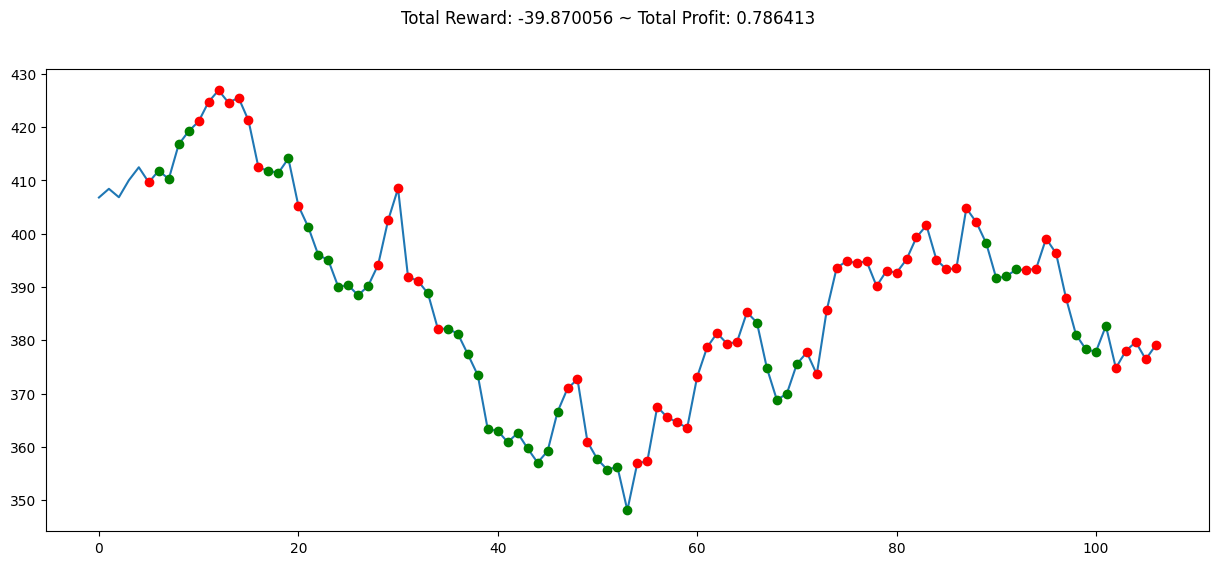

In [53]:
plt.figure(figsize=(15, 6))
plt.cla()
env.render_all()
plt.show()

## Second example solution: 
The agent state can be defined based on forecasts obtained from a RNN deep learning trained on trends in recent stock prices. A solution for this can be found at the following AWS Blog Post (a bit outdated, it was published in 2018): https://aws.amazon.com/blogs/machine-learning/forecasting-time-series-with-dynamic-deep-learning-on-aws/

## Thank you everyone!